In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

In [16]:
npys = glob('../data/**/*.npy', recursive=True)

df = pd.read_csv('../data/training_labels.csv')
df['id'] = df['id'].apply(lambda x: '../data/train/0/'+x+'.npy')
df = df[df.apply(lambda x: x['id'] in npys, axis=1)]

print(len(npys))
print(df.groupby('target').size())
df

158
target
0    81
1    77
dtype: int64


,id,target
0,../data/train/0/00000e74ad.npy,1
1,../data/train/0/00001f4945.npy,0
2,../data/train/0/0000661522.npy,0
3,../data/train/0/00007a006a.npy,0
4,../data/train/0/0000a38978.npy,1
...,...,...
1986,../data/train/0/00df6c7cc5.npy,0
1987,../data/train/0/00df81b3e1.npy,0
1988,../data/train/0/00dfb6a635.npy,1
1989,../data/train/0/00dfd3eab7.npy,1


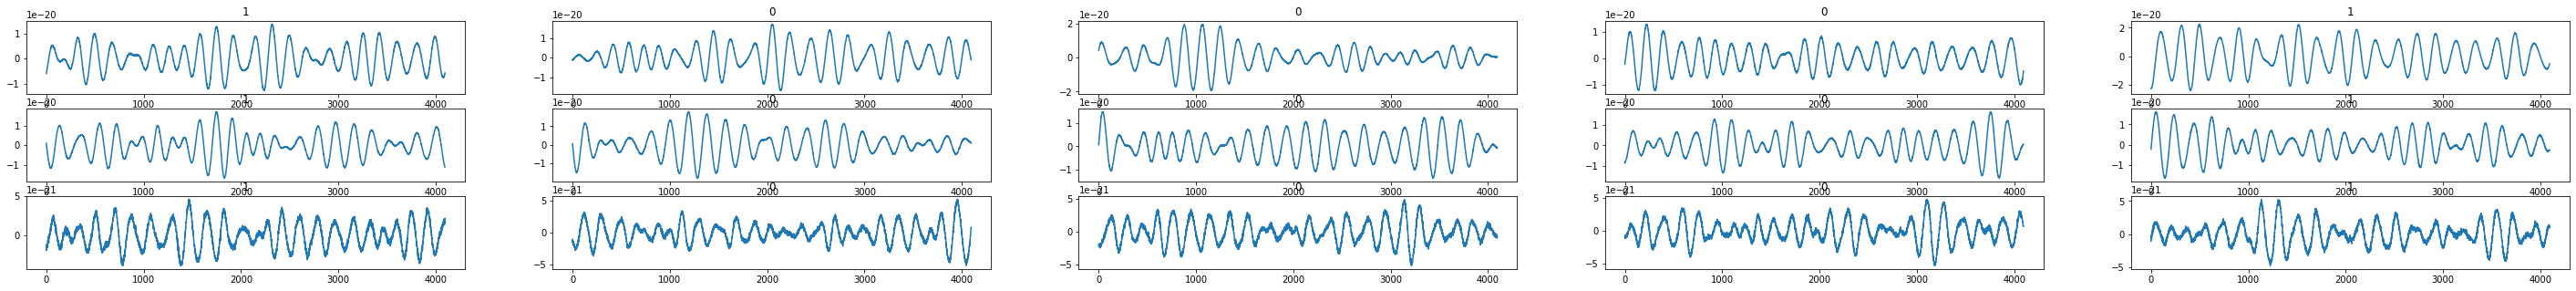

In [20]:
"""Remarks:
- Each detector yields different signal amplitude
- Third detector has noisy signal (thick curve)
- 
"""
axs = plt.subplots(3, 5, figsize=(50, 5))[1]
df = df.sample(frac=1.) # shuffle

for i in range(5):
    ts = np.load(df.loc[i, 'id'])
    for j in range(3):
        axs[j, i].plot(ts[j])
        axs[j, i].set_title(df.loc[i, 'target'])

plt.savefig('time_series.png')
plt.show()

In [24]:
from nnAudio.Spectrogram import STFT
import torch

sampling rate = 2048. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.1416 seconds
(3, 256, 257)
(3, 256, 257)
(3, 256, 257)
(3, 256, 257)
(3, 256, 257)


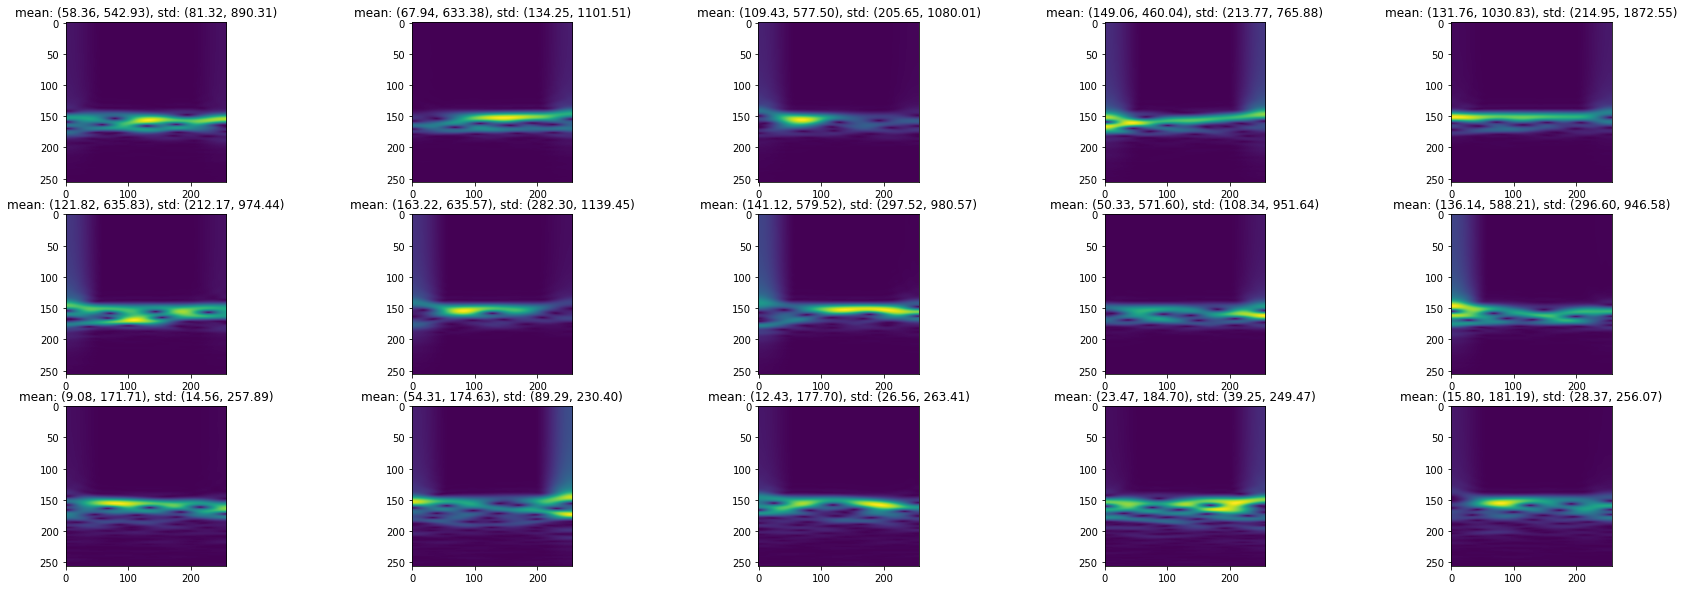

In [77]:
"""Remarks:
- freq_scale == log: depicts more than when using linear
- Lower frequencies are much more present than large ones.
- 
"""

stft = STFT(n_fft=4096, win_length=2048, freq_bins=256, hop_length=16, window='hann',
                sr=2048, fmin=1, fmax=50, center=True, 
                freq_scale='log', output_format='Magnitude', )
axs = plt.subplots(3, 5, figsize=(30, 10))[1]

for i in range(5):
    ts = np.load(df.loc[i, 'id'])
    spec = stft(torch.from_numpy(ts).float()).detach().numpy()*1e21
    print(spec.shape)
    for j in range(3):
        axs[j, i].imshow(spec[j])
        half = spec[j].shape[0]//2
        axs[j, i].set_title(f"mean: ({spec[j][:half].mean():.2f}, {spec[j][half:].mean():.2f}), std: ({spec[j][:half].std():.2f}, {spec[j][half:].std():.2f})")

plt.savefig('spectrogram.png')
plt.show()